#### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### read csv file

In [2]:
csv_in = '../cs3-02/wholesale_customers.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=13, header=0)
print(df.shape)
print(df.info())
display(df.head())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    int64 
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 27.6+ KB
None


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,Other,12669,9656,7561,214,2674,1338
1,2,Other,7057,9810,9568,1762,3293,1776
2,2,Other,6353,8808,7684,2405,3516,7844
3,1,Other,13265,1196,4221,6404,507,1788
4,2,Other,22615,5410,7198,3915,1777,5185


#### values of categoricla variables

In [3]:
print(df["Channel"].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64


In [4]:
print(df["Region"].value_counts())

Region
Other     316
Lisbon     77
Oporto     47
Name: count, dtype: int64


#### fundamental Statistics

In [5]:
df_num = df.loc[:, "Fresh":]
display(df_num.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
print(df_num.sum(axis=0))

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64


In [7]:
print(df_num.sum(axis=1))

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Length: 440, dtype: int64


In [8]:
ave_milk = df_num["Milk"].mean()
print(ave_milk)

5796.265909090909


## numpy

In [10]:
print(np.sum(df_num, axis=0))

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64


In [11]:
ave_milk = np.mean(df_num["Milk"])
print(ave_milk)

5796.265909090909


#### summary of each column

In [12]:
display(df.describe())

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
display(df.describe(exclude=[np.number]))

,Region
count,440
unique,3
top,Other
freq,316


#### Change data type of Channel column

In [15]:
df["Channel"] = df["Channel"].astype("category")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    object  
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicatessen      440 non-null    int64   
dtypes: category(1), int64(6), object(1)
memory usage: 24.7+ KB
None


In [16]:
display(df.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [17]:
display(df.describe(exclude=[np.number]))

,Channel,Region
count,440,440
unique,2,3
top,1,Other
freq,298,316


## Boxplot

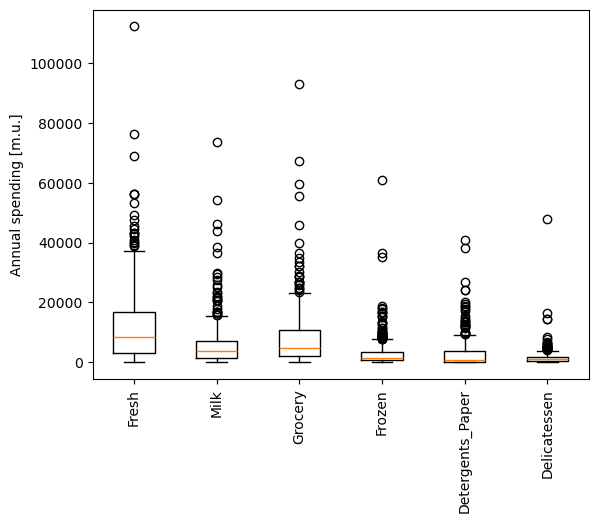

In [18]:
plt.boxplot(df_num, labels=df_num.columns)
plt.xticks(rotation=90)
plt.ylabel("Annual spending [m.u.]")
plt.show()

#### Histgram

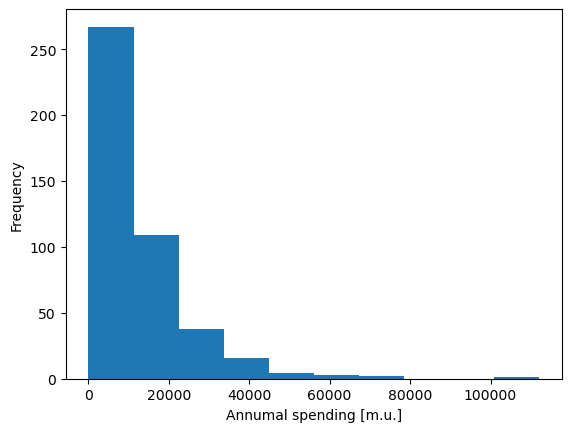

In [19]:
plt.hist(df_num["Fresh"])
plt.xlabel("Annumal spending [m.u.]")
plt.ylabel("Frequency")
plt.show()